In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../data/raw/women_management_worldbank.csv")
df.head()



,country_code,country,year,female_share_management
0,AFE,"{'id': 'ZH', 'value': 'Africa Eastern and Sout...",2024,NaN
1,AFE,"{'id': 'ZH', 'value': 'Africa Eastern and Sout...",2023,NaN
2,AFE,"{'id': 'ZH', 'value': 'Africa Eastern and Sout...",2022,NaN
3,AFE,"{'id': 'ZH', 'value': 'Africa Eastern and Sout...",2021,NaN
4,AFE,"{'id': 'ZH', 'value': 'Africa Eastern and Sout...",2020,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             16965 non-null  object 
 1   country                  17290 non-null  object 
 2   year                     17290 non-null  int64  
 3   female_share_management  1695 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 540.4+ KB


In [12]:
df.describe()

,year,female_share_management
count,17290.000000,1695.000000
mean,1992.000000,30.800116
std,18.762206,10.112091
min,1960.000000,1.194000
25%,1976.000000,24.343000
50%,1992.000000,31.535000
75%,2008.000000,37.468500
max,2024.000000,74.193000


In [13]:
df.isna().mean().sort_values(ascending=False)



female_share_management    0.901966
country_code               0.018797
country                    0.000000
year                       0.000000
dtype: float64

In [15]:
df['female_share_management'].isna().sum()



15595

In [16]:
df['female_share_management'].isna().mean()


0.9019664545980336

In [17]:
df_eda = df.dropna(subset=['female_share_management'])
df_eda.shape


(1695, 4)

In [18]:
df_eda['year'].describe()


count    1695.000000
mean     2013.532743
std         6.692166
min      2000.000000
25%      2008.000000
50%      2014.000000
75%      2019.000000
max      2024.000000
Name: year, dtype: float64

In [ ]:
## Create analysis dataset by excluding missing outcome values
# and restricting to post-2000 observations where coverage is reliable


In [19]:
df_eda = df.dropna(subset=['female_share_management'])


In [20]:
df_eda = df_eda[df_eda['year'] >= 2000]


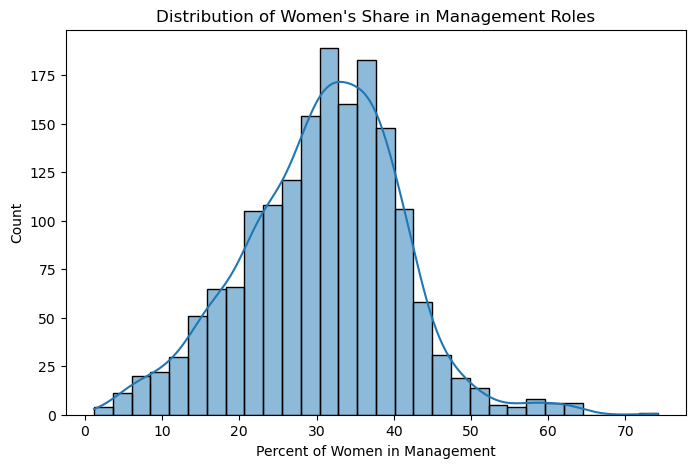

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_eda['female_share_management'], bins=30, kde=True)
plt.title("Distribution of Women's Share in Management Roles")
plt.xlabel("Percent of Women in Management")
plt.ylabel("Count")
plt.show()


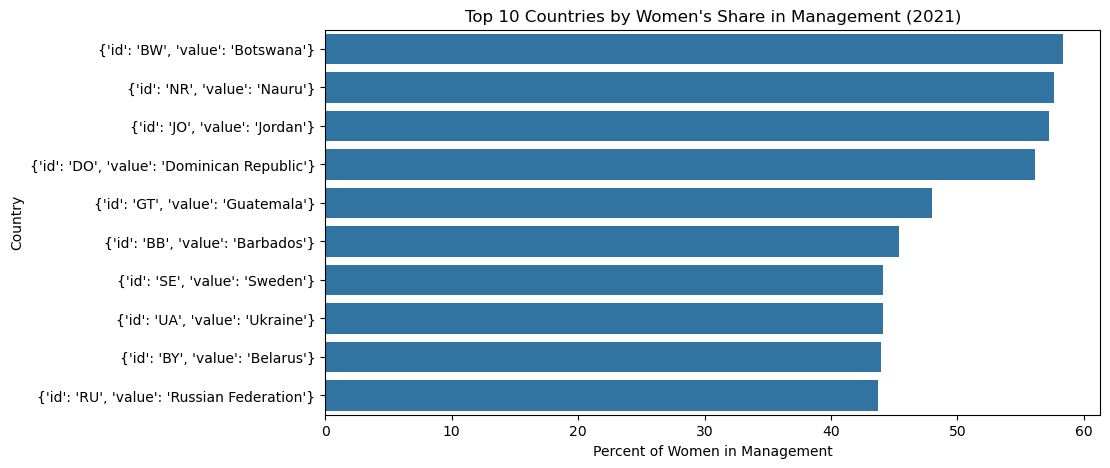

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# pick a year that actually exists in your filtered df_eda (you have up to 2024)
target_year = 2021

top_countries = (
    df_eda[df_eda['year'] == target_year]
    .sort_values('female_share_management', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_countries,
    x='female_share_management',
    y='country'
)
plt.title(f"Top 10 Countries by Women's Share in Management ({target_year})")
plt.xlabel("Percent of Women in Management")
plt.ylabel("Country")
plt.show()



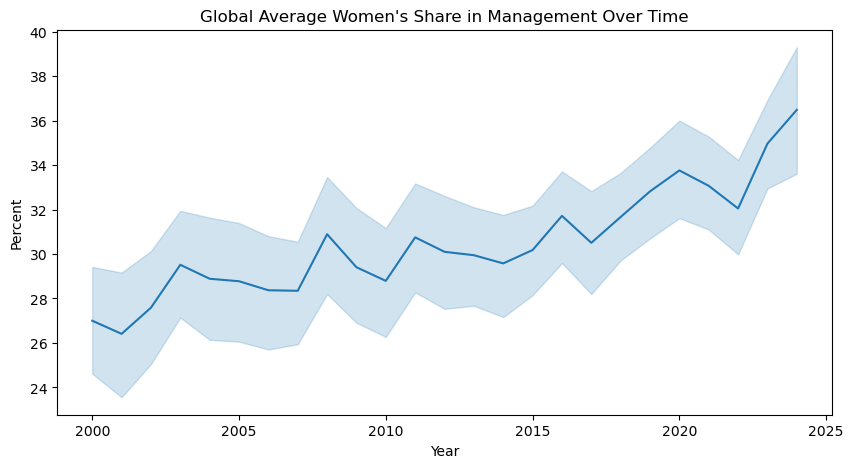

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_eda,
    x='year',
    y='female_share_management',
    estimator='mean'
)
plt.title("Global Average Women's Share in Management Over Time")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


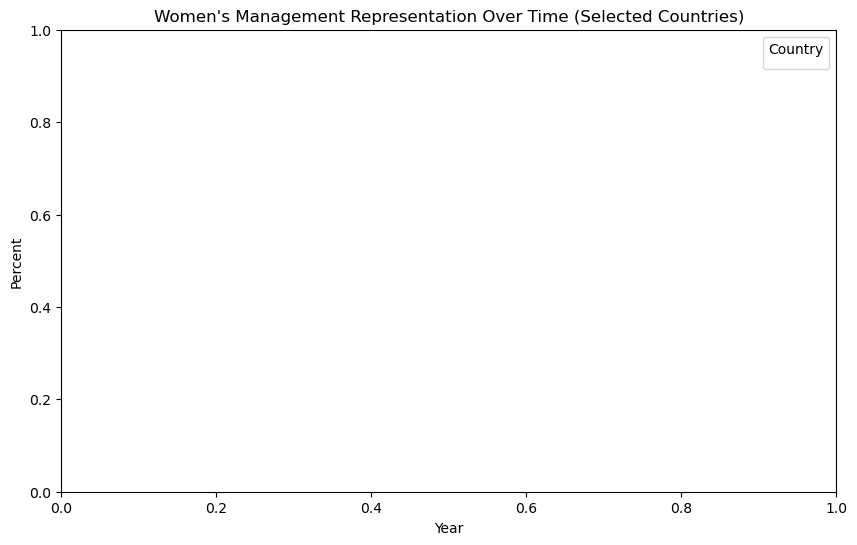

In [29]:
countries = ['United States', 'Sweden', 'Germany', 'Japan', 'Brazil']

subset = df_eda[df_eda['country'].isin(countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='year', y='female_share_management', hue='country')
plt.title("Women's Management Representation Over Time (Selected Countries)")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.legend(title="Country")
plt.show()


In [33]:
df_eda['country'].unique()[:50]





array(["{'id': 'AF', 'value': 'Afghanistan'}",
       "{'id': 'AL', 'value': 'Albania'}",
       "{'id': 'AO', 'value': 'Angola'}",
       "{'id': 'AR', 'value': 'Argentina'}",
       "{'id': 'AM', 'value': 'Armenia'}",
       "{'id': 'AU', 'value': 'Australia'}",
       "{'id': 'AT', 'value': 'Austria'}",
       "{'id': 'BS', 'value': 'Bahamas, The'}",
       "{'id': 'BD', 'value': 'Bangladesh'}",
       "{'id': 'BB', 'value': 'Barbados'}",
       "{'id': 'BY', 'value': 'Belarus'}",
       "{'id': 'BE', 'value': 'Belgium'}",
       "{'id': 'BZ', 'value': 'Belize'}",
       "{'id': 'BJ', 'value': 'Benin'}",
       "{'id': 'BT', 'value': 'Bhutan'}",
       "{'id': 'BO', 'value': 'Bolivia'}",
       "{'id': 'BA', 'value': 'Bosnia and Herzegovina'}",
       "{'id': 'BW', 'value': 'Botswana'}",
       "{'id': 'BR', 'value': 'Brazil'}",
       "{'id': 'BN', 'value': 'Brunei Darussalam'}",
       "{'id': 'BG', 'value': 'Bulgaria'}",
       "{'id': 'BF', 'value': 'Burkina Faso'}",
       "{'i

In [34]:
import ast

# Convert the stringified dict into a real dict, then pull the "value" (country name)
df_eda['country_name'] = df_eda['country'].apply(lambda x: ast.literal_eval(x)['value'])
df_eda['country_code'] = df_eda['country'].apply(lambda x: ast.literal_eval(x)['id'])

df_eda[['country_code','country_name']].head()


,country_code,country_name
3189,AF,Afghanistan
3192,AF,Afghanistan
3195,AF,Afghanistan
3251,AL,Albania
3252,AL,Albania


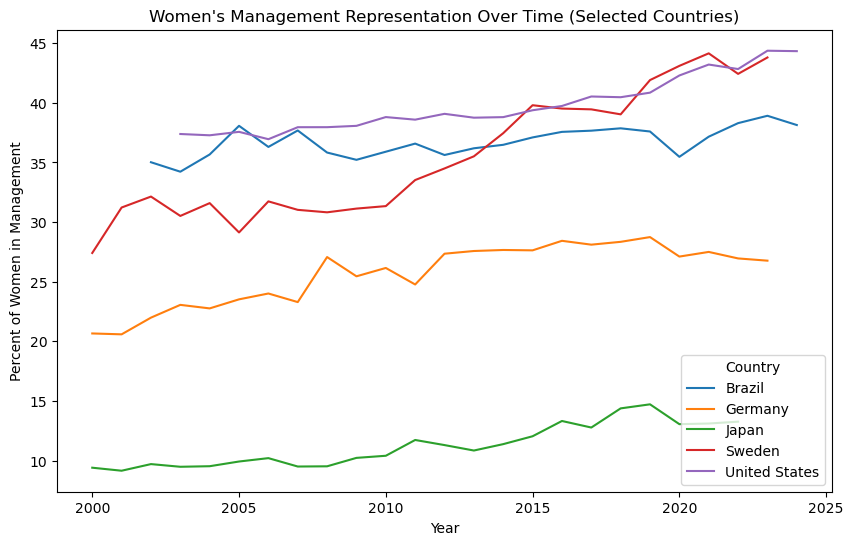

In [36]:
countries = ['United States', 'Sweden', 'Germany', 'Japan', 'Brazil']

subset = df_eda[df_eda['country_name'].isin(countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='year', y='female_share_management', hue='country_name')
plt.title("Women's Management Representation Over Time (Selected Countries)")
plt.xlabel("Year")
plt.ylabel("Percent of Women in Management")
plt.legend(title="Country")
plt.show()


In [38]:
#Leave Policy EDA
analysis_df = pd.read_csv("../data/processed/analysis_dataset.csv")


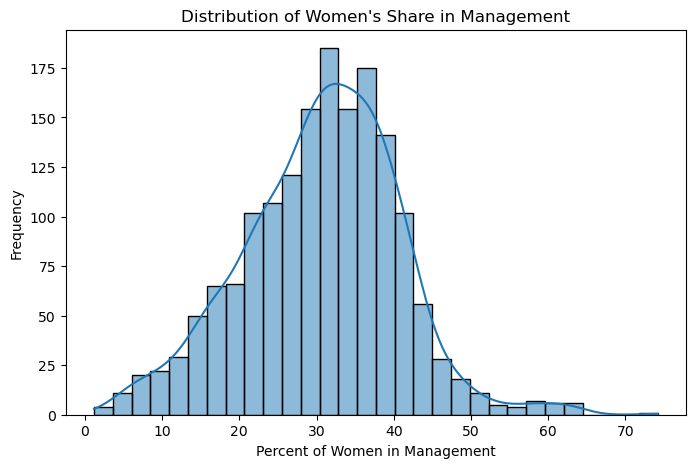

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(analysis_df['female_share_management'], bins=30, kde=True)
plt.title("Distribution of Women's Share in Management")
plt.xlabel("Percent of Women in Management")
plt.ylabel("Frequency")
plt.show()



Figure 1 shows the distribution of women’s share in senior and middle management across countries and years. The distribution is moderately right-skewed, with most observations clustering between approximately 20% and 40%, while relatively few countries exceed parity. This suggests persistent global underrepresentation of women in leadership and motivates further investigation into institutional factors that may influence these outcomes.

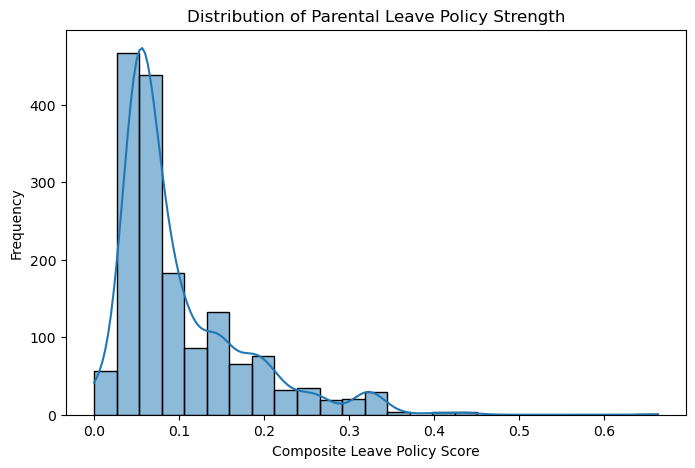

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(analysis_df['leave_policy_strength'], bins=25, kde=True)
plt.title("Distribution of Parental Leave Policy Strength")
plt.xlabel("Composite Leave Policy Score")
plt.ylabel("Frequency")
plt.show()


Figure 2 presents the distribution of the composite parental leave policy strength index. The distribution reveals substantial cross-national variation, indicating meaningful differences in the generosity and structure of paid leave policies. This variation supports the use of leave policy strength as an explanatory variable in subsequent analyses.

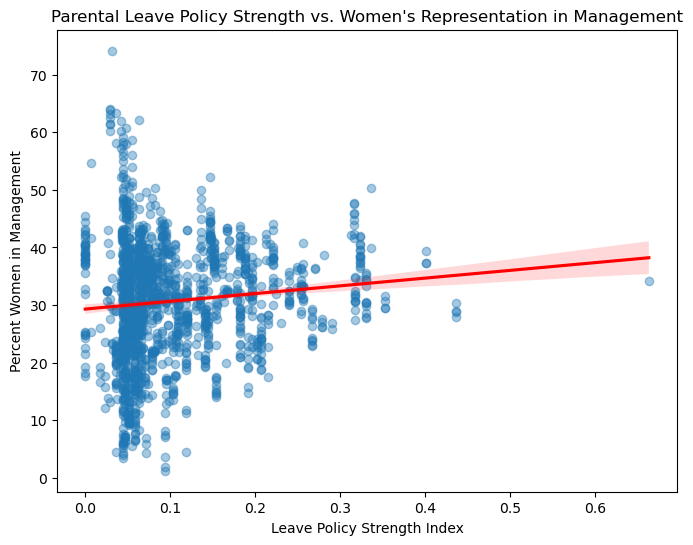

In [41]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=analysis_df,
    x='leave_policy_strength',
    y='female_share_management',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Parental Leave Policy Strength vs. Women's Representation in Management")
plt.xlabel("Leave Policy Strength Index")
plt.ylabel("Percent Women in Management")
plt.show()


Figure 3 illustrates the relationship between parental leave policy strength and women’s representation in management. A positive association is visually apparent, with higher policy strength generally corresponding to higher female representation. While substantial dispersion remains, the trend suggests that stronger parental leave frameworks may be associated with improved leadership outcomes for women.

In [42]:
analysis_df['policy_quartile'] = pd.qcut(
    analysis_df['leave_policy_strength'], 
    4, 
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)


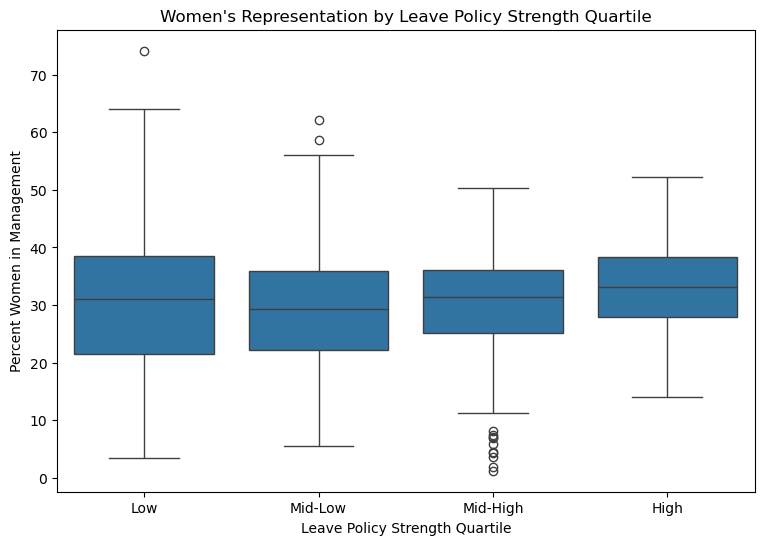

In [43]:
plt.figure(figsize=(9,6))
sns.boxplot(
    data=analysis_df,
    x='policy_quartile',
    y='female_share_management'
)
plt.title("Women's Representation by Leave Policy Strength Quartile")
plt.xlabel("Leave Policy Strength Quartile")
plt.ylabel("Percent Women in Management")
plt.show()


Figure 4 compares women’s representation in management across quartiles of parental leave policy strength. Countries in the highest policy strength quartile exhibit notably higher median female representation and reduced variability compared to those in the lowest quartile. This pattern provides preliminary evidence consistent with the hypothesis that stronger leave policies are associated with improved leadership outcomes for women.

In [44]:
analysis_df['policy_group'] = analysis_df['policy_quartile'].replace({
    'Low':'Low Policy',
    'High':'High Policy'
})
subset = analysis_df[analysis_df['policy_group'].isin(['Low Policy', 'High Policy'])]


C:\Users\megan\AppData\Local\Temp\ipykernel_18876\2540328157.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  analysis_df['policy_group'] = analysis_df['policy_quartile'].replace({


C:\Users\megan\AppData\Local\Temp\ipykernel_18876\2778453305.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


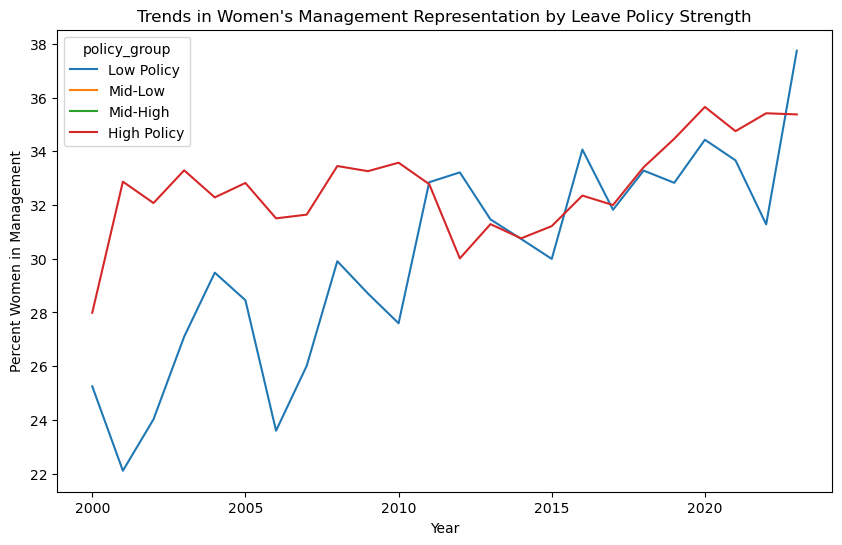

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=subset,
    x='year',
    y='female_share_management',
    hue='policy_group',
    ci=None
)
plt.title("Trends in Women's Management Representation by Leave Policy Strength")
plt.xlabel("Year")
plt.ylabel("Percent Women in Management")
plt.show()


Figure 5 displays trends in women’s representation in management over time for countries with low versus high parental leave policy strength. While both groups show gradual increases over time, high-policy countries consistently maintain higher levels of female representation. This suggests that policy environments may play a role not only in levels but also in long-term trajectories of women’s leadership participation.